# GRIP :THE SPARKs FOUNDATION 
# Data Science and Business Analytics Intern
# Author: AYUSHI PRIYA
# Task 1:Prediction Using Supervised ML
In this task we have to precict the percentage score of a student based on the number of hours studied.Basically the task have two variables where the features is the no.of hours studied and the target value is the percentage score. So,here I  solved this by Linear regression

In [47]:
#STEP 1 IMPORTING THE DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# To ignore warning
import warnings as wg
wg.filterwarnings("ignore")


In [38]:
#read the data from the link
data=pd.read_csv("http://bit.ly/w-data")
# TO FIND THE NO OF ROWS AND COLUMN OF THE DATASET
print('shape of the dataset is: ',data.shape)
# NOW LETS OBSERVE THE DATASET
data.head()
 

shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [3]:
#checking the missing value
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
 # TO FIND THE INFORMATION ABOUT THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [41]:
#now we will check is there any missing value or null value that our data set have
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

# STEP 2: VISUALIZING THE DATASET

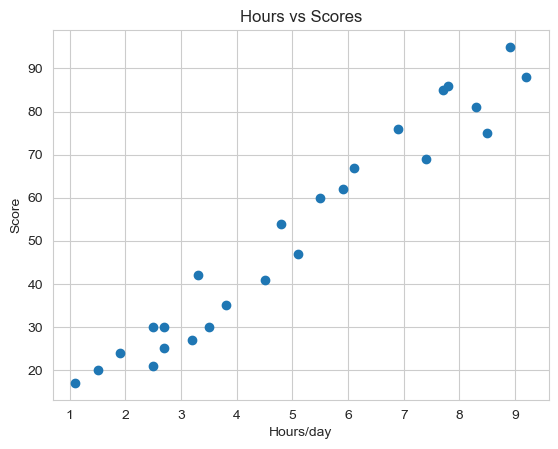

In [49]:

plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours/day')
plt.ylabel('Score')
plt.title("Hours vs Scores")
plt.show()
#This shows that the scores increases with number of hours.

   # From the above graph we can observe that there is a linear relation between "Hours/day" and score. So we can use the linear regression supervised machine model on it predictt futher values.
   
   
   
   
   
   # Lets verify this with correlation function




In [23]:

data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


so the both the variables are positively correlated to each other


# STEP 3: DATA PREPARATION
HERE WE WILL GOING TO SPLIT THE WHOLE DATA INTO TWO PARTS-TESTING DATA AND TRAINING DATA.
SO ,USING iloc function we will divide the data

In [24]:
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

#  STEP 4:TRAINING THE  ALGORITHM
WE HAVE SPITTED THE DATA INTO TRAINING AND TESTING SETS,NOW WE WILL TRAIN OUR MODEL

In [26]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

# STEP 5: VISUALIZING THE MODEL
AFTER TRAINING THE MODEL,NOW IT'S TIME TO VISUALIZE IT.

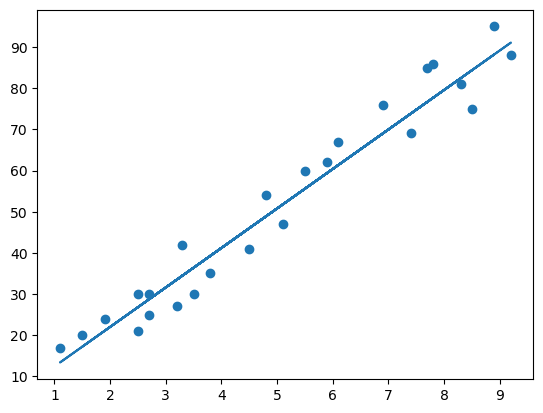

In [27]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

#  STEP 6: MAKING PREDICTIONS

In [28]:
y_pred=reg.predict(x_test)

In [30]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


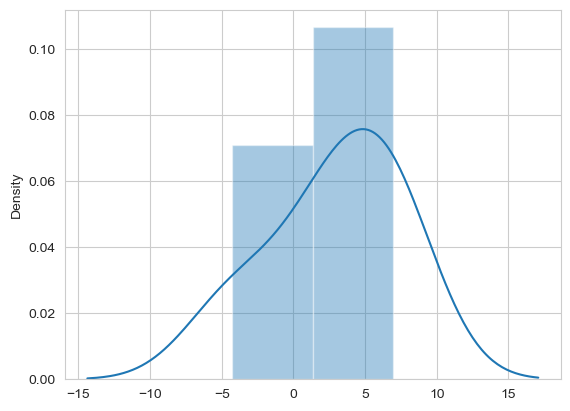

In [48]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()


# what would be the predicated score if a student studies for 9.25 hours/day?

In [33]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he /she will score {} % in exam".format(h,s))

If a student studies for 9.25 hours per day he /she will score [91.56986604] % in exam


# STEP 7: Model  Evaluation

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error : 4.5916495300630285
R2 Score: 0.971014141329942
